# Introdução ao Deep Learning

Nesta aula começaremos a falar sobre os princípios do Deep Learning, passando pelos conceitos de Modelos Paramétricos, Regressão Logística (com perspectiva de *deep learning*), *score function* e entender como uma rede neural é capaz de classificar uma imagem.

Na próxima aula iremos entrar em cost function e um algoritmo conhecido como ***Gradient Descente*** **(GD)** -  a cereja do bolo!

Para você ter uma ideia a respeito da motivação em aprendê-lo, veja o que diz *Goodfellow et al (2016)*  em seu livro *Deep Learning*, referência em referência absoluta na área:


> *Praticamente, tudo que se chama deep learning é movido por um algoritmo muito importante: Stochastic Gradient Descent (SGD).*

Mas antes de entrar no SGD diretamente, vamos dar uma olhada em alguns conceitos primários.





## Modelos Paramétricos

Um modelo de *machine learning* tem a capacidade de aprender padrões a partir de dados de *input* durante uma etapa conhecida como treinamento.

Esse modelo é representado não por todos os dados que o alimentam, mas por um número limitado de parâmetros. Ou seja, independente do tamanho do meus dados de treino, é possível **generalizar**, representar os mesmos por meio de parâmetros.


<p align="center">
<img height="500" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/classificacao-anvs.png">
</p>

Considere que você queira treinar um modelo de *deep learning* para reconhecer se há uma aeronave em uma imagem. As seguintes classificações são possíveis:

* **1:** Quando é detectada uma aeronave na imagem; e
* **2:** Quando não é detectada uma aeronave na imagem.

Basicamente, as imagens normais que usaremos é composta por 3 canais de cores (RGB). Se formos olhar mais de perto, veremos temos 3 matrizes (uma para cada canal) e que cada pixel é representado por um número entre $0-255$.

<p align="center">
<img height="350" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/anv-rgb.png">
</p>

## Classificação Binária

Claramente, nós seres humanos podemos identificar que existe algum tipo de padrão que faz com que nosso cérebro reconheça rapidamente se uma imagem é um avião ou não. Trazendo para o lado da matemática, assuma que existe uma função $y = f^{*}(x)$ que mapeia o nosso *input* $x$ para uma categoria $y \in \{0, 1 \}$.

A imagem do caça acima tem dimensões iguais a $64 \times 64$ *pixels*. No lugar de termos 3 matrizes  $64 \times 64$ *pixels*, podemos gerar um vetor $x$ único contendo todos seus valores:

$$
\begin{equation}
\begin{aligned}
x&=
    \begin{bmatrix}
        123 \\ 250 \\ \vdots \\ 70 \\ 100 \\ \vdots \\130
    \end{bmatrix}
&&n_x = 64 \times 64 \times 3 = 12288
\end{aligned}
\end{equation}
$$

Dependendo a literatura adotada, você vai ter notações matemáticas e teóricas divergentes. Essas divergências podem ser puramente relacionadas aos símbolos e letras convencionadas ou em algum conceito.

Também não é minha ideia mergulhar fundo nessa parte mais matemática, então resolvi simplificar o que poderia ser simplificado (com menos rigor acadêmico), mas sem perder a essência. Vamos ver as convenções e notações que eu irei usar.

* Uma única amostra de treino é representado pela tupla:

$$
\begin{align}
(x, y) && onde && x& \in \rm I\!R^{n_x}, \\
&& && y& \in \{0, 1\}
\end{align}
$$

* Para um conjunto de $m$ amostras de treinamento:

$$
m\text{-amostras: } \{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)}) \}
$$

Essa notação acima é muito didática, porém você também consegue representar a mesma coisa, porém de forma mais compacta usando a notação da Álgebra Linear. Veja como eu represento matricialmente um conjunto de dados de treino contendo $m$ amostras diferentes.

$$
\begin{aligned}
X&=
\begin{bmatrix}
    \bigg\rvert & \bigg\rvert &  & \bigg\rvert \\
    x^{(1)} & x^{(2)} & \dots & x^{(m)} \\
    \bigg\rvert & \bigg\rvert &  & \bigg\rvert
\end{bmatrix}
\end{aligned}
$$

Um detalhe que devemos sempre nos atentar diz respeito à dimensionalidade. Tenha em mente que $X \in \rm I\!R^{n_x \ \times \ m}$, o que pode ser verificado diretamente no código checando o atributo do *array* com `X.shape` $= (n_x, m)$.

Convenientemente, para facilitar implementações e operações matriciais, usaremos um vetor horizontal $y$ contendo os *outputs labels*.

$$
\begin{equation}
\begin{aligned}
Y&=
    \begin{bmatrix}
        y^{(1)}, y^{(1)}, \dots, y^{(m)}
    \end{bmatrix}
\end{aligned}
\end{equation}
$$

Em relação à dimensionalidade do vetor, temos que $Y \in \rm I\!R^{1 \ \times \ m}$, o que pode ser verificado diretamente no código checando `Y.shape` $= (1, m)$.

## Classificador Linear: Das Imagens para os *Labels*

Dentro do campo de *machine learning* (ML), temos uma classe de problemas conhecida como classificação estatística. Um classificador linear consegue tomar a decisão de classificar um determinado objeto mediante combinação linear das suas características (*features*).

Nesta seção, eu irei falar sobre Regressão Logística, um algoritmo de ML amplamente usado para classificação em problemas de aprendizado supervisionado.

### Regressão Logística


No exemplo de identificar se nossa foto é um avião ou não, temos um problema de classificação binária onde você recebe um vetor $x \in \rm I\!R^{n_x}$ contendo as *features* (os *pixels* da imagem) e o algoritmo de Regressão Logística retorna a probabilidade $\hat{y} = P(y=1 | x)$ de ser um avião.

Para entender o algoritmo GD, precisamos entrar em dois conceitos-chaves:

1. *Score Function*
2. *Cost Function*

#### 1. *Score Function*

*Machine learning*, ou aprendizado de máquina é o nosso campo de estudo. O "*learning*" significa que de alguma maneira o computador é capaz de aprender. Essa maneira é por meio da otimização dos parâmetros $\theta \in \rm I\!R^{n_x}$ e $b \in \rm I\!R$.

A *score function* é uma função que vai receber o nosso *input* (no exemplo usado aqui, uma imagem) e mapear os dados para as classes de *labels*. A função mais simples possível para fazer isso é o **mapeamento linear**:

$$
f(x, \theta, b) = \hat{y} = \theta^Tx + b
$$

**Uma pausa.**

Lembra que estamos falando de classificação de imagens, e da probabilidade dessa imagem ser um avião ou não?

O problema é que a nossa *score function*, do jeito que está, pode retornar qualquer valor. Só que se eu espero obter uma probabilidade como *output*, é esperado que $0 \leq \hat{y} \leq 1$.

Uma das maneiras de fazer isso é usando uma função de ativação conhecida como **função sigmóide**.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

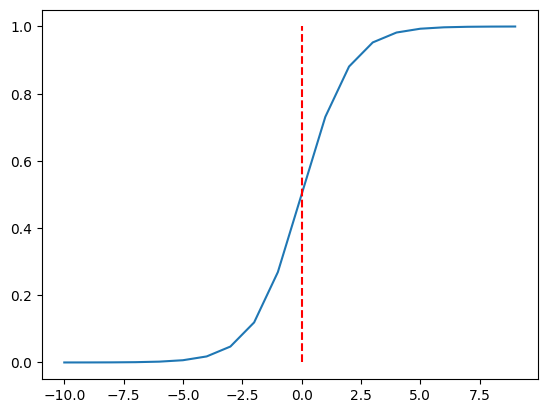

In [1]:
# importar pacotes necessários
import numpy as np
import matplotlib.pyplot as plt

# criar um set entre -10 e 10 e aplicar a função sigmóide
x = np.arange(-10, 10)
y = 1 / (1 + np.exp(-x))

# plotar a curva sigmoidal
plt.plot(x, y)
plt.vlines(0, 0, 1, colors='r', linestyles='dashed')
plt.show()

Em suma, o *output* que queremos estará no formato

$$\hat{y} = \sigma(\theta^Tx + b) = \frac{1}{1 + e^{-(\theta^Tx + b)}}$$


Como estamos falando de NN (*feedforward neural networks*, mais especificamente), o nosso objetivo é aproximar essa função $f(x, \theta, b) = f^{*}(x, \theta, b)$. Isso significa que durante a fase de treinamento nós conduzimos $f(x, \theta, b)$ para equiparar $f^{*}(x, \theta, b)$.

Voltando a função de ativação, utilizamos a mesma para (1) inserir não-lineariedade no problema e (2) gerar probabilidade para um problema de classificação binária.

Utilizando a função de ativação aplicada na *score function*, ou seja $\sigma( \theta^T x + b)$, conseguiremos mapear qualquer valor para dentro do intervalo $0 \leq \hat{y} \leq 1$. Veja um exemplo de onde usamos essa teoria para prever se uma imagem é um avião ou não.

<p align="center">
<img height="350" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/passe-nn.png">
</p>

As etapas ilustradas na imagem acima são:

1. Transformar a imagem em um vetor.
2. Multiplicar o valor de cada pixel de $x$ por um peso de $w$.
3. Obter o valor de $z = w^T x + b$.
4. Obter a probabilidade $\hat{y} = P(y=1 | x)$ de ser um avião. Ou seja, obter o valor de $\hat{y} = \sigma(z)$.
5. Classificar a imagem com o label `avião` ($0.91 \gt 0.5)$.

## Visualizando uma imagem

Para mostrar os *pixels* de uma imagem, vamos importar um exemplo com o OpenCV e ver o *array* que representa a intensidade de cada um.

In [2]:
# importar o OpenCV
import cv2

In [3]:
# baixar uma imagem de exemplo
!wget https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/aviao_64x64.jpg
!ls

--2024-07-10 21:51:36--  https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/aviao_64x64.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14272 (14K) [image/jpeg]
Saving to: ‘aviao_64x64.jpg’

aviao_64x64.jpg     100%[===================>]  13.94K  --.-KB/s    in 0.001s  

2024-07-10 21:51:36 (25.0 MB/s) - ‘aviao_64x64.jpg’ saved [14272/14272]

aviao_64x64.jpg  sample_data


In [4]:
# ler a imagem usando o OpenCV
img = cv2.imread("aviao_64x64.jpg")

In [5]:
# ver suas dimensões
img.shape

(64, 64, 3)

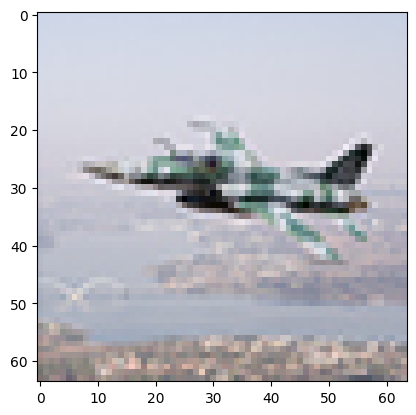

In [6]:
# plotar a imagem usando o `matplotlib`
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### **Referências**

*Goodfellow, I.; Bengio, Y.; Courville, A. **Deep Learning**. MIT Press, 2016.*